In [2]:
import numpy as np
from numpy import linalg as LA
# https://numpy.org/doc/stable/reference/routines.linalg.html
# from statistics import 
# https://numpy.org/doc/stable/reference/routines.statistics.html


import scipy
from scipy import linalg
# https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/stats.html

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
"""Explorar estas dos funciones"""

"""tenemos una nube de puntos en el plano (x,y)"""


def pca (X,Y):
# reshaping la data para que tenga shape (n,1) venga
# de esa forma o venga (n,)
    lX = len(X)
    lY = len(Y)
    X = X.reshape((lX,1))
    Y = Y.reshape((lY,1))
# centramos la data, trasladandonos al sistema de
# coordenadas en el los mean() = 0
    X -= np.mean(X)
    Y -= np.mean(Y)
# construimos la matriz D a partir de la data X e Y
    D = np.concatenate((X, Y), axis=1)
# matriz A = matriz varianza/covarianza
    A = np.dot(np.transpose(D),D)/lX
# ver diferencia entre LA.eug() y LA.eigh()
    w, v = LA.eigh(A) 
# v es la matriz cuyas columnas son los autovectores de
# A, ordenados de menor a mayor autovalor. 
# Entonces la ultima columna corresponde al autovector
# con mayor autovalor. v[1,1]/v[0,1] es el cociente
# de la coordenada y / coordenada x de este autovector
# es decir, en el plano (x,y), es la pendiente de la recta
# mas cercana a los puntos. Que tambien es la recta que
# captura la mayor varianza.
    return w, v , v[1,1]/v[0,1]

def ls (X,Y):
    lX = len(X)
    lY = len(Y)
    X = X.reshape((lX,1))
    X -= np.mean(X)
    Y = Y.reshape((lY,1))
    Y -= np.mean(Y)
# Hacemos la regresion tratando de "explicar" a Y con X.
# Como hemos centrado la data, la ordenada al origen es cero,
# por lo que el problema en R^(nx1) (n es numero de datos)
# consiste en encontrar la coordenada del vector Y
# de la proyeccion ortogonal de Y en la direccion
# de X, en la base dada por X.
    b = np.dot(np.transpose(X),Y)/np.dot(np.transpose(X),X)
    return b[0,0]

autovalores pca =  [0.  0.5]
autovectores pca = 
 [[-0.89442719  0.4472136 ]
 [ 0.4472136   0.89442719]]
pendiente pca =  2.0
pendiente ls = 2.0


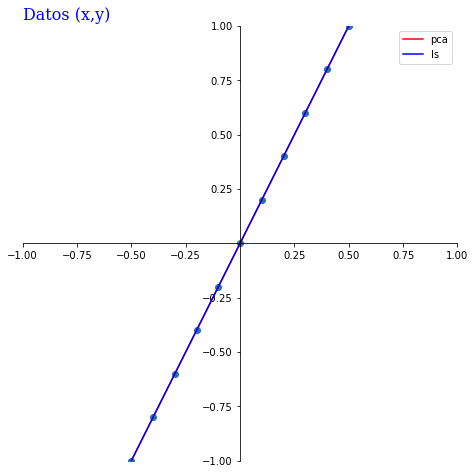

In [28]:
"""1.a

Con X = [0.0; 0.1; 0.2; ... ; 1] e Y = 2X. Aseguremonos que ambas
funciones dan 2 para la pendiente."""

"""Datos"""

x = np.linspace(0.0, 1, 11)
y = 2*x

"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Grafico de los datos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 1.0
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=None)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

autovalores pca =  [0.08209548 0.08432491]
autovectores pca = 
 [[-0.83583867  0.54897515]
 [ 0.54897515  0.83583867]]
pendiente pca =  1.5225437458405235
pendiente ls = 0.012359801074612712


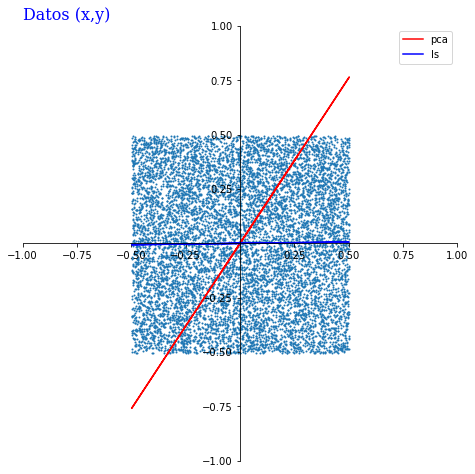

In [29]:
np.random.seed(1)
"""1.b

Los elementos de X e Y son elegidos al azar de forma idéntica e independiente
(por ejemplo, cada elemento está distribuido uniformemente en el cuadrado [0; 1] x [0; 1]).
Repetir varias veces y mirar los graficos ¿Qué genera PCA y qué  LS?, Por que?

Jugar con el parametro n y s. Tambien pasar de 

np.random.rand a np.random.randn (ajustanto l para escalar apropiadamente la region
del grafico)

Por que pasa lo que pasa?"""

"""Datos"""

n = 10000
s = 1.0
x = s*np.random.rand(n,1)
y = np.random.rand(n,1)

"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 1
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=1)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

¿Por qué PCA da cualquier cosa? ¿Por qué la regresion da $y \sim 0$?

### Respuestas:

- ¿Por qué PCA da cualquier cosa?


Recordemos que PCA nos captura las mayores (direcciones de) variabilidad de los datos y hace de cada una un "componente principal". Por lo general, serán $d-1$ componentes para $d$ dimensiones, ya que el objetivo de PCA es reducir la dimensionalidad de los problemas también.

Considerando los resultados "aleatorios" de PCA para este caso, podemos deducir que captura diferentes direcciones de máxima varianza para el -casi- mismo set de datos y esto sería, naturalmente, contraintuitivo. 

Sin embargo, si evaluamos los datos generados aleatoriamente podemos observar que están distribuidos de manera uniforme. Esto significa que la variabilidad es capturable de manera uniforme también. Este approach geométrico puede extenderse al siguiente ejemplo: para una mayor intuición supongamos que nuestros datos se extienden en el límite $n \rightarrow \infty$. Esta creación de puntos conllevaría en el caso hipótetico que terminaríamos disponiendo de un "cuadrado" de área $lado\cdot lado$. Si tomamos una recta (centrada en el origen, por supuesto) y queremos minimizar el cuadrado de la distancia euclidiana de los puntos a esta, veremos que no importa cómo esté posicionada la recta, encontrará distancias igualmente proporcionales (" siempre equidistantes") de cada lado, por lo que habrá muchas proyecciones de los datos sobre el "componente principal".

Explicado esto, aunque ya hemos tenemos un enfoque geométrico válido y una intuición respecto el problema, cabe aclarar que la distribución uniforme no es condición suficiente ni necesaria para que estrictamente sucedan estos resultados de PCA. Este efecto deviene de la varianza que es igual en todas las direcciones, como ya explicamos.


- ¿Por qué la regresión da $y \sim 0$?

Uno de los propósitos de un modelo lineal es ver cómo varía una variable en función de la variación de otra variable. Ahora bien, en nuestro ejemplo, tenemos dos variables con igual varianza a lo largo del rango (-1,1) tanto para $X$ como $Y$, por lo que intuitivamente no tiene sentido emplear una regresión lineal.

Hecha esta consideración, podemos responder sin embargo la pregunta sobre por qué MCO ajusta un linea que es $y \sim 0$. Si observamos en detalle nuestro resultado, el coeficiente de regresión es cero, lo que indica pendiente nula (o cero relación entre los datos). Esto quiere decir que $X$ explica literalmente nada de $Y$, lo que sería un resultado similar a un modelo sin variables independientes (y sin  intercepto):

$y_i = \epsilon_i$

La variable dependiente resulta igual a los errores, ya que en la ecuación $\beta_i\cdot X_i = 0$ y desaparece.


In [42]:
# Vemos la matriz de covarianzas de los datos:

print("X data: ", x.T)
print("Y data: ", y.T)
print("Data Covariance matrix: \n", np.cov(x.T,y.T))
# La correlación es prácticamente 0.001 entre X e Y

print("PCAs Covariance matrix: \n" , np.cov(v))

X data:  [[-0.08097443  0.22232806 -0.49788206 ... -0.43846274 -0.38995278
   0.26479734]]
Y data:  [[ 0.26093969 -0.1963845   0.23082061 ... -0.45936831  0.19197084
  -0.20491453]]
Data Covariance matrix: 
 [[0.08277565 0.00102309]
 [0.00102309 0.08366139]]
PCAs Covariance matrix: 
 [[0.95885466 0.19862629]
 [0.19862629 0.04114534]]


### Comentario adicional:

Podemos ver que la correlación entre X e Y resulta ser muy baja, lo que indica una relación espuria en términos de una posible variabilidad significativa.

autovalores pca =  [0.03260394 0.63618279]
autovectores pca = 
 [[-0.95705399  0.28990975]
 [ 0.28990975  0.95705399]]
pendiente pca =  3.3012135666560813
pendiente ls = 2.0096226675961844


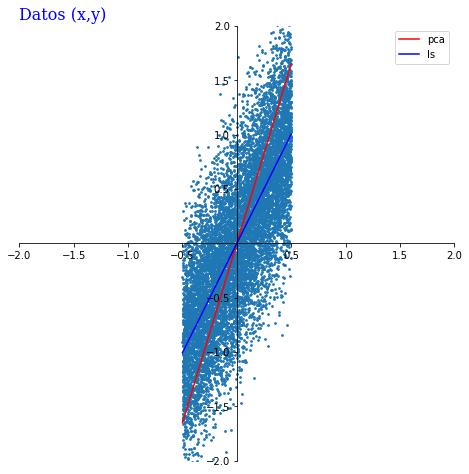

In [43]:
"""1.c

Consideramos el caso donde x es la variable independiente (también conocida como explicativa), 
a la que conocemos perfectamente, pero solo podemos obtener mediciones ruidosas de y.
Fix X = [x1, x2,..., x1000] = [0.001, 0.002, 0.003,..., 1]. xi = i/1000, i = 1,...,1000
yi = 2*xi + Norm(0,s^2) = 2*i/1000, Y = [y1, y2,..., y1000].

1.c.1 Por que pasa lo que pasa en esta celda? """

"""Datos"""

n = 10000
s = 0.5
x = np.arange(0.0, 1, 1/n)
y = 2*x + s*np.random.randn(n)

"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 2.0
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=3)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

In [47]:
# Vemos la matriz de covarianzas de los datos:

print("Data Covariance matrix: \n", np.cov(x.T,y.T))

Data Covariance matrix: 
 [[0.12594705 0.16892909]
 [0.16892909 0.37270172]]


### Respuesta:

Introduciendo un ruido de tipo Gaussiano en la variable $Y_i$ podemos considerar que, a diferencia del caso anterior, la varianza de los datos se modifica. Esto es visible a simple vista, no por la forma de la distribución de puntos como "paralelogramo", sino principalmente por la concentración de puntos en el centro y difusión en las puntas verticales. Notar que a mayor el coeficiente de ruido ($s$ en el código) mayor será la dispersión en los datos (para el caso contrario, vemos que se compactan).
Que la varianza cambie, para alguno de los dos vectores (en este caso $Y_i$) implicará, por ende, variaciones significativas en los datos que son capturables (no como en el ejercicio anterior que la máxima variación de los datos era igual en cualquier dirección).

Explicado esto, el hecho de que corriendo PCA varias veces sobre nuestro set de datos arroje resultados similares (con variaciones infinitesimales en los autovalores y por ende, distintos autovectores y pendiente) significa que esta nueva variabilidad en los datos fue capturada correctamente y se puede distinguir visualmente en mitades (divididas por la recta diagonal de PCA).
Una pregunta aquí es, ¿qué quiere decirnos PCA al separar los datos por la mitad? Que sean datos aleatorios no tendrá una fundamentación real detrás. De todas maneras, la "separación diagonal en mitades" visualmente puede verse que la recta roja es ortogonal a los puntos y, otra vez, se nota la diferencia entre la minimización de la _distancia euclidiana_ de PCA versus la minimización de _distancia vertical_ respecto el eje X que hace la regresión.


Por otro lado y en línea con el comentario anterior, vemos que Least Squares tiene una pendiente menor (e igual a la pendiente que parecen tener los datos cuando se distribuyen en los extremos) porque dada la distribución de los datos (con el ruido gaussiano) es la pendiente que minimiza la distancia vertical al eje X (por eso se puede explicar la menor pendiente que PCA). Así, la línea de regresion es el mejor fit por su pendiente "precisa", pero falla en capturar por el valor de $Y_i$ (tendrá un error grande) por el intercepto nulo.
Esto último, en otras palabras, significa que si quisieramos usar la regresión como modelo explicativo en un dataset de testing, el crecimiento de los datos es capturado perfectamente por la pendiente, pero no así el valor final de la variable explicada porque puede caer muy por encima o por debajo de la linea de regresión (un error muy grande).

En conclusión, para este caso regresión sería nuestra mejor opción entre ambos métodos.


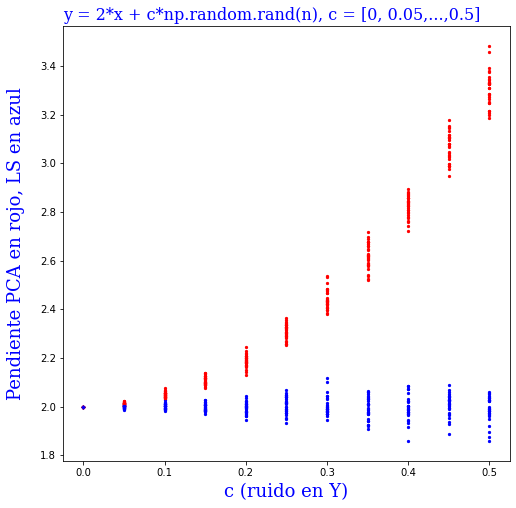

In [23]:
"""1.c.2: Para cada s en [0, 0.05, 0.1,..., 0.45, 0.5] calculamos
30 veces la pendiente predicha por pca y ls y hacemos un scatter plot.

De nuevo la misma pregunta, por que pasa lo que pasa? """

"""Preparando el Graficos"""
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel("c (ruido en Y)", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("Pendiente PCA en rojo, LS en azul", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("y = 2*x + c*np.random.rand(n), c = [0, 0.05,...,0.5]", loc='left',
             fontsize=16, fontname='serif', color="blue")

"""Estudio"""
n = 1000
x = np.arange(1/n, 1+1/n, 1/n)
s = np.linspace(0, 0.5, 11)
prc = np.zeros(11)
regr = np.zeros(11)

for i in range(30):
    count = 0
    for t in s:
        y = 2*x + t*np.random.randn(n)
        w, v, b = pca(x,y)
        c = ls(x,y)
        prc[count] = b
        regr[count] = c
        count += 1
    ax.scatter(s, prc, s=5, c="red")
    ax.scatter(s, regr, s=5, c="blue")


### Respuesta:

Como se comentó en el punto anterior, vemos que la regresión mantiene el mejor fit en términos de pendiente y que PCA cambia la pendiente de forma tal que visualmente se ve la ortogonalidad entre los puntos y esta. El hecho de que la pendiente aumente (en vez de disminuir) se fundamenta en que el a mayor coeficiente del ruido gaussiano, los puntos van "rotando" en sentido antihorario, o sea, sino uno hipoteticamente los siguiera desde el eje X con pendiente cero, el sentidoantihorario implica mayores pendientes de una recta en la rotación.

autovalores pca =  [0.04013384 0.45846507]
autovectores pca = 
 [[-0.89157046  0.452882  ]
 [ 0.452882    0.89157046]]
pendiente pca =  1.968659520502602
pendiente ls = 1.3412707060277087


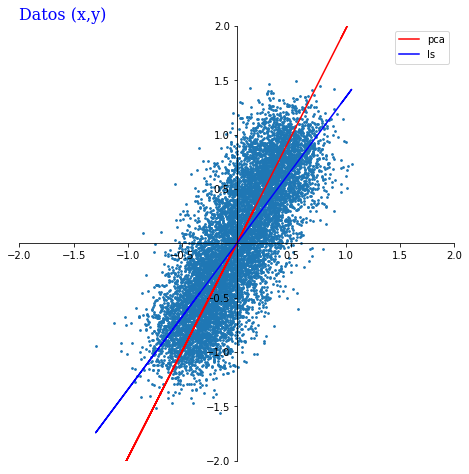

In [45]:
"""1.d Ahora consideremos el caso donde ambos, X e Y tienen ruido
   xi = i/1000 + Norm(0,s^2),  ; yi = 2*xi + Norm(0,s^2), i = 1,...,1000
   X = [x1, x2,..., x1000] , Y = [y1, y2,..., y1000].
   
   Hacer los mismos estudios que en 1.c
   
   1.d.1"""

"""Datos"""

# jugar con diferentes valores de n y s
n = 10000
s = 0.2
z = np.arange(0.0, 1, 1/n) 
x = z + s*np.random.randn(n)
y = 2*z + s*np.random.randn(n)


"""Resultados pca y ls"""

w, v, b = pca(x,y)

c = ls(x,y)

print("autovalores pca = ", w)
print("autovectores pca = \n", v)

print("pendiente pca = ", b)
print("pendiente ls =", c)

"""Graficos"""

fig, ax = plt.subplots(figsize=(8,8))

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

l = 2
ax.set_xticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])
ax.set_yticks([-1*l,-0.75*l,-0.5*l, -0.25*l, 0.25*l, 0.5*l, 0.75*l, 1*l])


ax.set_title("Datos (x,y)", loc='left',
             fontsize=16, fontname='serif', color="blue")

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(x-np.mean(x), y-np.mean(y), s=3)

ax.plot(x, b*x, color="red", label="pca")
ax.plot(x, c*x, color="blue", label="ls")


ax.legend()

plt.show()

In [46]:
# Vemos la matriz de covarianzas de los datos:

print("Data Covariance matrix: \n", np.cov(x.T,y.T))

Data Covariance matrix: 
 [[0.12594705 0.16892909]
 [0.16892909 0.37270172]]


### Respuesta:

Para este caso particular, en el que ahora además introducimos un ruido gaussiano en la variable $X_i$, podemos observar ciertas particularidades en el comportamiento de los resultados para ambos métodos, que no podían apreciarse en los ejercicios anteriores.

Primeramente, como análisis descriptivo de los "nuevos" datos, vemos que el ruido en ambas variables implica que ahora los puntos se "difuminen" en ambos ejes (tanto verticalmente como horizontalmente). Es una nube de puntos mejor distribuida en términos de variabilidad, ya que no representa las anomalidades de uniformidad que veíamos en los casos anteriores.

Explicado lo anterior entonces, por un lado, considerando los resultados de PCA, vemos que ante el nuevo ruido la variabilidad es capturada nuevamente de forma tal que la proyección de los puntos sobre el componente principal resulta ortogonal, minimizando así la distancia euclidiana de los puntos a la recta. A diferencia del caso anterior, podemos intuir que PCA ajusta perfecto a la dirección de crecimiento de los datos (la pendiente tendría un error bajo respecto la pendiente visual de los datos).

Por otro lado, podemos notar que a diferencia del caso anterior, la regresión lineal no ajusta su pendiente cómo esperariamos y no logra capturar la dirección de crecimiento de los datos, por el contrario su pendiente decrece y se acerca al eje X a mayor coeficiente de ruido.

A continuación, podemos mostrar visualmente que, a mayor coeficiente de ruido, en el margen tendremos un caso como el primer ejercicio: la regresión perdiendo su pendiente ante una relación espuria en los datos. La distancia vertical se acerca a la distancia del eje X respecto los puntos.

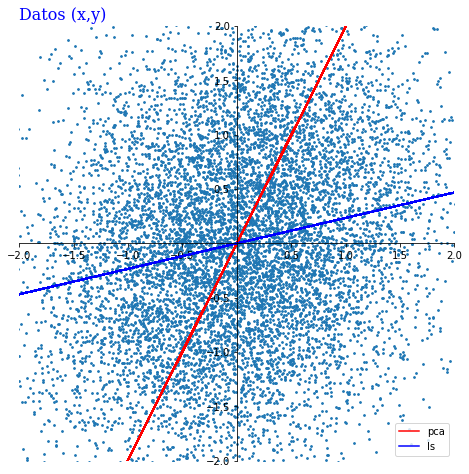

En síntesis, para este caso PCA sería nuestra mejor opción, mientras que regresión no ajusta bien.

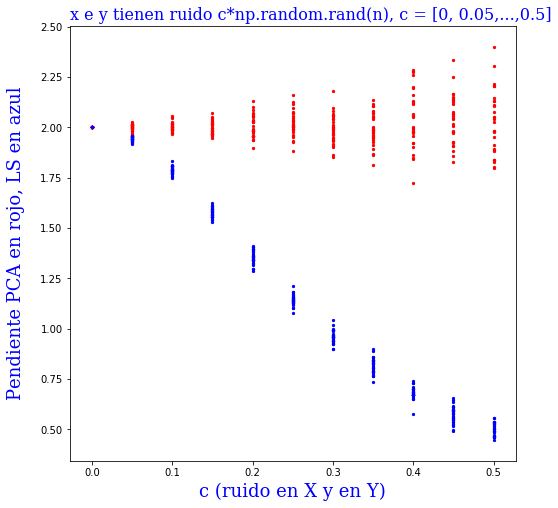

In [11]:
"""1.d.2"""
"""Preparando el Graficos"""
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel("c (ruido en X y en Y)", labelpad=5,
              fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("Pendiente PCA en rojo, LS en azul", labelpad=15,
              fontsize=18, fontname='serif', color="blue")
ax.set_title("x e y tienen ruido c*np.random.rand(n), c = [0, 0.05,...,0.5]", loc='left',
             fontsize=16, fontname='serif', color="blue")

"""Estudio"""
n = 1000
z = np.arange(1/n, 1+1/n, 1/n)
s = np.linspace(0, 0.5, 11)
prc = np.zeros(11)
regr = np.zeros(11)

for i in range(30):
    count = 0
    for t in s:
        x = z + t*np.random.randn(n)
        y = 2*z + t*np.random.randn(n)
        w, v, b = pca(x,y)
        c = ls(x,y)
        prc[count] = b
        regr[count] = c
        count += 1
    ax.scatter(s, prc, s=5, c="red")
    ax.scatter(s, regr, s=5, c="blue")

# ¿Por qué PCA funciona mejor en un estudio y regresiones en el otro? 

Divida esto en tres preguntas:

(i) ¿Por qué PCA funciona mal con el ruido solo en Y?
   
(ii) ¿Por qué PCA funciona bien con el ruido en X e Y?
   
(iii) ¿Por qué la regresion funciona mal con ruido en X e Y?
   
(iv) Por que en la "nube cuadrada" pca da cualquier cosa mientras que regresiones siempre da lo mismo?

### Respuestas breves:

Como se respondió anteriormente, luego del output de cada celda, podemos sintetizar las conclusiones de la siguiente manera:

(I) PCA minimiza el promedio del cuadrado de la distancia euclidiana entre los puntos y la recta y, de esta manera, capturando mal la variabilidad visual que se nota al ojo humano respecto el crecimiento de los datos. Por el contrario, la regresión lineal resulta con un coeficiente $\beta_i$ perfecto para la pendiente de crecimiento de los puntos.
Ver respuesta completa en la celda correspondiente.


(II) PCA funciona bien para el ejercicio donde introducimos ruido en ambas variables ya que, como hemos visto, captura la variabilidad de los puntos de manera tal que la pendiente de crecimiento de los datos parece ser la correcta intuitivamente.
Ver respuesta completa en la celda correspondiente.


(III) El modelo de regresión lineal no funciona bien para el caso con ruido en ambas variables, ya que este dispersa los datos de manera tal que deja de capturar una relación y se acerca al eje X (decrece su pendiente). En el caso hipótetico donde el coeficiente del ruido tiene al infinito $\rightarrow \infty$ nos acercamos a los resultados del ejercicio (1).
Ver respuesta completa en la celda correspondiente.


(IV) Tal como se indica en la respuesta ampliada, el hecho que los datos tengan igual varianza a lo largo de toda la distribución, implica que PCA captura variabilidades iguales en todas las direcciones y que la regresión nos muestre una relación espuria en el dataset. Por ese motivo es que el modelo lineal es el eje X (que significa $Y_i = \epsilon_i$) donde $X_i=0$ y no está en la ecuación.
Ver respuesta completa en la celda correspondiente.



### Conclusiones adicionales:

Aunque hemos explorado cada caso particular, cabe destacar que ambos métodos cuantitativos estadísticos son altamente fuertes para trabajar en ciencia de datos y extraer conocimiento de una muestra de datos que refleje el comportamiento de la realidad. Sin embargo, es posible realizar la aclaración de que, regresión es uno de los métodos principales en _Supervised ML_ (aprendizaje automático supervisado) y, a su vez, PCA es una de las metodologías principales en _Unsupervised ML_ (aprendizaje automático no supervisado). A pesar de que nosotros estamos trabajando en unsupervised learning y con datos surreales generados aleatoriamente, en la práctica las herramientas no suelen ser aplicadas con el mismo propósito.

Aclarado lo anterior, de todas maneras, resulta importante agregar que existe una combinación de ambos métodos:
correr un modelo lineal múltiple de regresión con los componentes principales como variables independientes. Esto se lo conoce como _Principal Component Regression_.


### Leer respuestas completas en las respectivas celdas de cada ejercicio.